In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

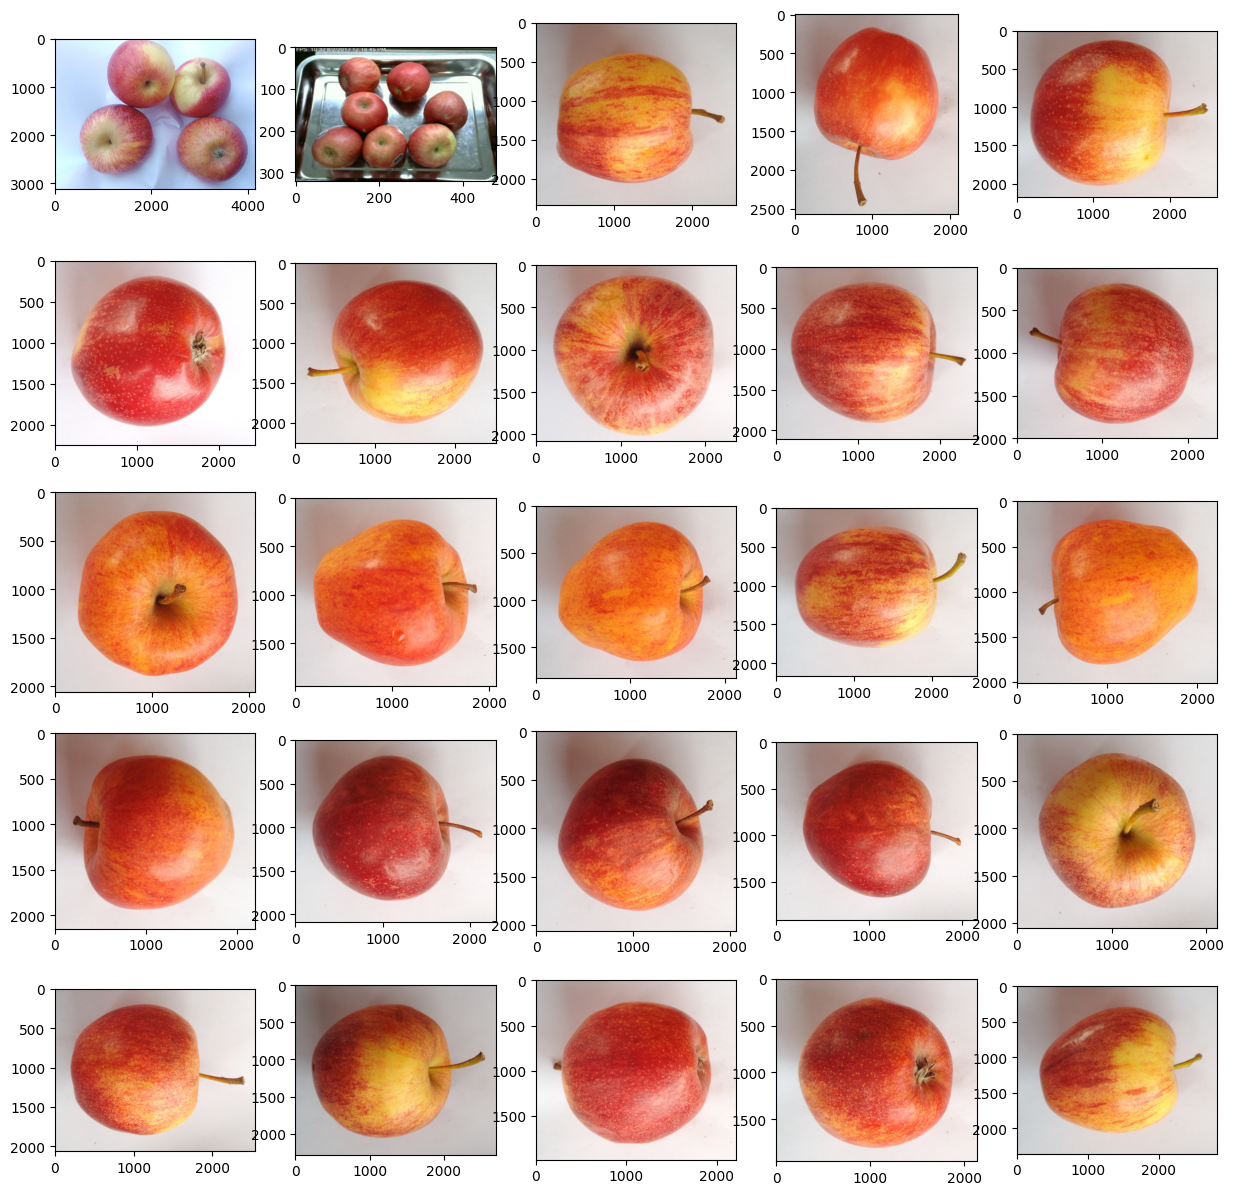

In [2]:
plt.figure(figsize=(15,15))
carpeta=r"C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\Apple__Healthy"
imagenes=os.listdir(carpeta)

for i, nombreimg in enumerate(imagenes[:25]):
    plt.subplot(5,5,i+1)
    imagen=mpimg.imread(carpeta+"/"+nombreimg)
    plt.imshow(imagen)

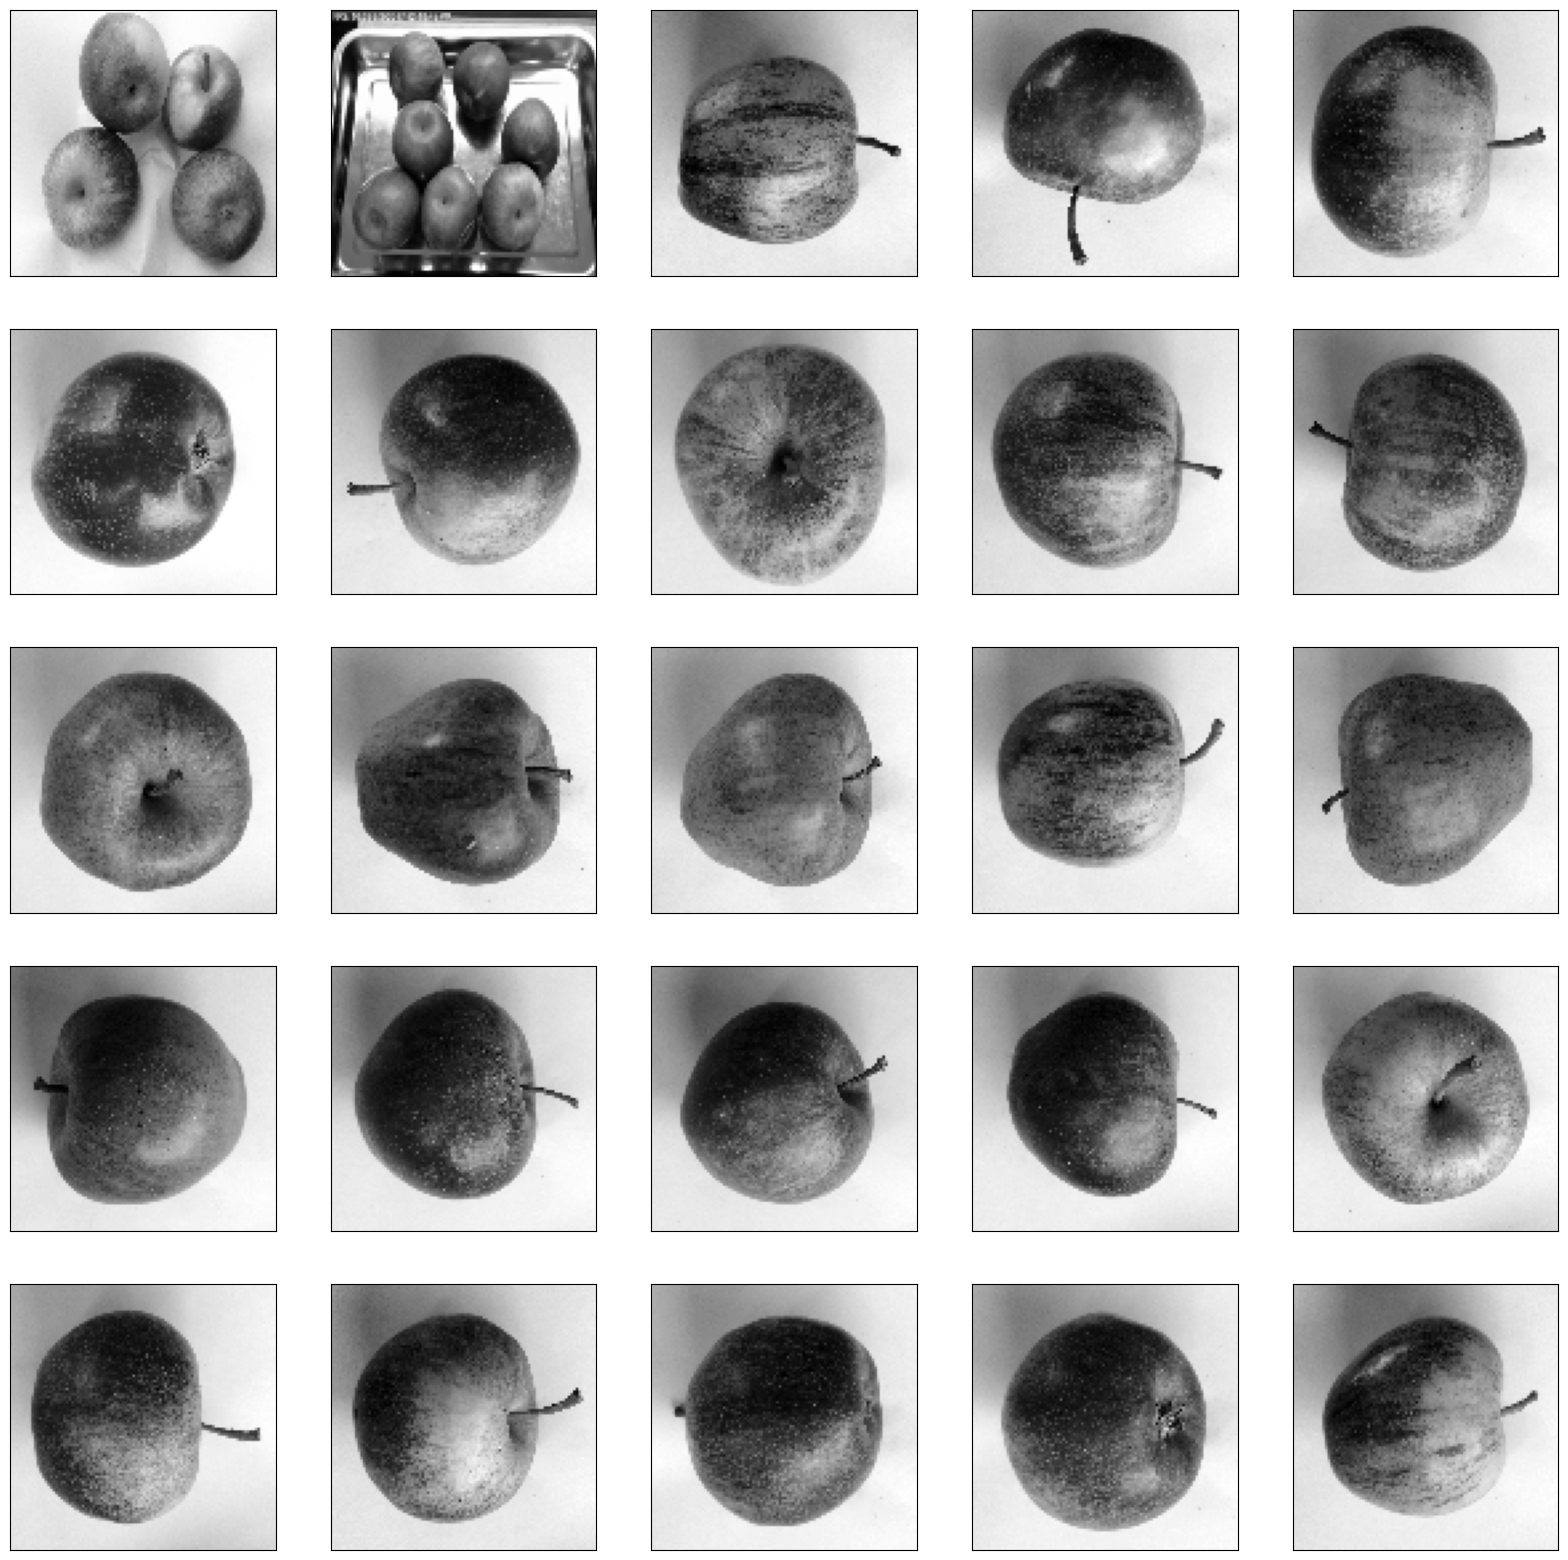

In [3]:
plt.figure(figsize=(20,20))

TAMAÑO_IMG=100

for i, nombreimg in enumerate(imagenes[:25]):
    plt.subplot(5,5,i+1)
    imagen=mpimg.imread(carpeta+"/"+nombreimg)
    #print(imagen.shape)
    imagen=cv2.resize(imagen,(TAMAÑO_IMG,TAMAÑO_IMG))
    imagen=cv2.cvtColor(imagen,cv2.COLOR_BGR2GRAY)
    #print(imagen.shape)
    imagen = imagen.reshape(100, 100, 1)
    #print(imagen.shape)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen,cmap="gray")

OBTAINING THE IMAGES (WORK AROUND VERSION)

In [4]:
#defining the dataset subfolder names
"""
columns = ['Apple__Healthy', 'Apple__Rotten', 'Banana__Healthy', 'Banana__Rotten', 'Bellpepper__Healthy',
           'Bellpepper__Rotten', 'Carrot__Healthy', 'Carrot__Rotten', 'Cucumber__Healthy', 'Cucumber__Rotten',
           'Grape__Healthy', 'Grape__Rotten', 'Guava__Healthy', 'Guava__Rotten', 'Jujube__Healthy', 'Jujube__Rotten',
           'Mango__Healthy', 'Mango__Rotten', 'Orange__Healthy', 'Orange__Rotten', 'Pomegranate__Healthy','Pomegranate__Rotten',
           'Potato__Healthy', 'Potato__Rotten', 'Strawberry__Healthy', 'Strawberry__Rotten', 'Tomato__Healthy', 'Tomato__Rotten']
"""
columns=['Apple__Healthy', 'Apple__Rotten']

In [5]:
#algorithm to append the images into a list
images = []
labels = []
img_size = 100

count = 0
for folder in columns:
    print('Loading --> ', folder)
    for img in os.listdir(r'C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\images\Fruit And Vegetable Diseases Dataset' + '/' + folder):
        image = cv2.imread(r'C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\images\Fruit And Vegetable Diseases Dataset' + '/' + folder + '/' + img)
        image = cv2.resize(image, (img_size, img_size)) # Changing the img size
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Transforming the img in gray scale
        image_gray = image_gray.reshape(img_size, img_size, 1) # Changing shape to 100, 100, 1
        images.append(image_gray)
        labels.append(count)
    count += 1
print('Finalized')

Loading -->  Apple__Healthy
Loading -->  Apple__Rotten
Finalized


In [6]:
#printing the labels
unique_labels = list(set(labels))
print(unique_labels) #e.g. 0 healthy 1 not healthy

[0, 1]


In [7]:
#printing an image
print(images[0].shape) #know the shape of the array e.g. if (100,100,1) 100x100 image 1 represent grey color
print(type(images[0])) #know the type of the item
print(images[0])

(100, 100, 1)
<class 'numpy.ndarray'>
[[[229]
  [235]
  [234]
  ...
  [225]
  [221]
  [218]]

 [[231]
  [230]
  [235]
  ...
  [223]
  [225]
  [218]]

 [[228]
  [232]
  [234]
  ...
  [227]
  [219]
  [217]]

 ...

 [[239]
  [239]
  [237]
  ...
  [202]
  [201]
  [197]]

 [[238]
  [236]
  [236]
  ...
  [200]
  [200]
  [192]]

 [[237]
  [232]
  [235]
  ...
  [204]
  [201]
  [200]]]


In [8]:
data_gen_entrenamiento = []
for img, label in zip(images, labels):
    data_gen_entrenamiento.append([img, label])

In [9]:
print(type(data_gen_entrenamiento)) #type of the principal container
print(len(data_gen_entrenamiento)) #len of the list that contains a list of images and labels
print(type(data_gen_entrenamiento[0])) #type of the item, is a list containing as items the image and the label
print(len(data_gen_entrenamiento[0])) #len of the item of the list 2 items one for the image and one for the label

<class 'list'>
5368
<class 'list'>
2


In [10]:
X = [] #pixeles of the images
y = [] #labels 

for img , lab in data_gen_entrenamiento:
    X.append(img)
    y.append(lab)

In [11]:
print(type(X))
#print(X[0])

<class 'list'>


In [12]:
import numpy as np
#reescaling
X = np.array(X).astype(float)/255

In [13]:
print(X.shape)
print(X.ndim)
print(X[0].shape)
print(X[0])

(5368, 100, 100, 1)
4
(100, 100, 1)
[[[0.89803922]
  [0.92156863]
  [0.91764706]
  ...
  [0.88235294]
  [0.86666667]
  [0.85490196]]

 [[0.90588235]
  [0.90196078]
  [0.92156863]
  ...
  [0.8745098 ]
  [0.88235294]
  [0.85490196]]

 [[0.89411765]
  [0.90980392]
  [0.91764706]
  ...
  [0.89019608]
  [0.85882353]
  [0.85098039]]

 ...

 [[0.9372549 ]
  [0.9372549 ]
  [0.92941176]
  ...
  [0.79215686]
  [0.78823529]
  [0.77254902]]

 [[0.93333333]
  [0.9254902 ]
  [0.9254902 ]
  ...
  [0.78431373]
  [0.78431373]
  [0.75294118]]

 [[0.92941176]
  [0.90980392]
  [0.92156863]
  ...
  [0.8       ]
  [0.78823529]
  [0.78431373]]]


In [14]:
y = np.array(y)

In [15]:
print(y[0])

0


In [16]:
print(X.shape) #5368 entradas 100 x 100 imagen y 1 escala de grises

(5368, 100, 100, 1)


In [18]:
#without data aumenting
denseModel=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(100,100,1)),
    tf.keras.layers.Dense(150,activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [19]:
denseModel.compile(optimizer="adam",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

In [20]:
denseModel.fit(X,y,batch_size=32,
              validation_split=0.15,
              epochs=100)

Epoch 1/100
143/143 [==============================] - 3s 6ms/step - loss: 0.7605 - accuracy: 0.6420 - val_loss: 1.1540 - val_accuracy: 0.1824
Epoch 2/100
143/143 [==============================] - 1s 4ms/step - loss: 0.5972 - accuracy: 0.6852 - val_loss: 0.9065 - val_accuracy: 0.3759
Epoch 3/100
143/143 [==============================] - 1s 4ms/step - loss: 0.5639 - accuracy: 0.7054 - val_loss: 1.2058 - val_accuracy: 0.2953
Epoch 4/100
143/143 [==============================] - 0s 3ms/step - loss: 0.5800 - accuracy: 0.6861 - val_loss: 0.9426 - val_accuracy: 0.3610
Epoch 5/100
143/143 [==============================] - 0s 3ms/step - loss: 0.5473 - accuracy: 0.7104 - val_loss: 0.8543 - val_accuracy: 0.4057
Epoch 6/100
143/143 [==============================] - 0s 3ms/step - loss: 0.5541 - accuracy: 0.7091 - val_loss: 1.1069 - val_accuracy: 0.2283
Epoch 7/100
143/143 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.7221 - val_loss: 0.7963 - val_accuracy: 0.5087

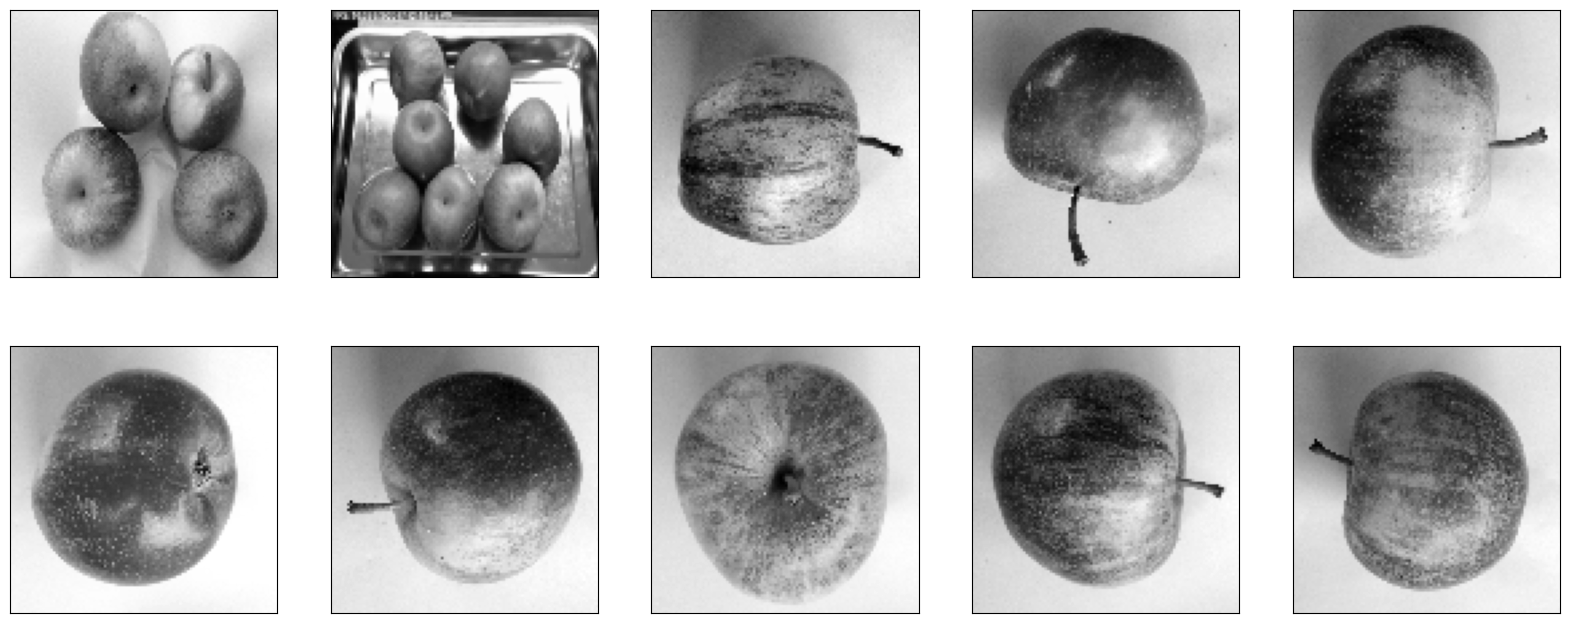

In [21]:
plt.figure(figsize=(20,8))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X[i].reshape(100,100),cmap="gray")

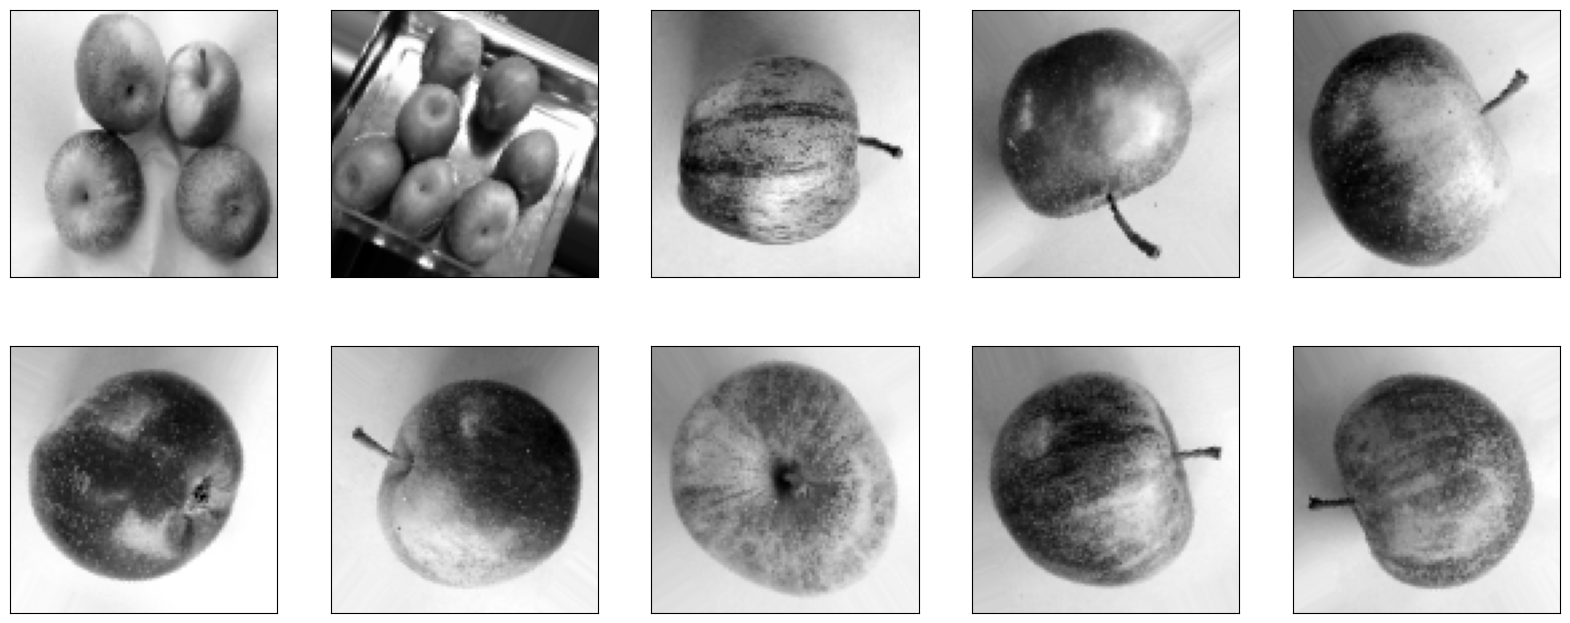

In [22]:
#generating the data augmentation
#random rotation
datagen=ImageDataGenerator(
    rotation_range=50
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen,etiqueta in datagen.flow(X,y,batch_size=10,shuffle=False):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i].reshape(100,100),cmap="gray")
    break

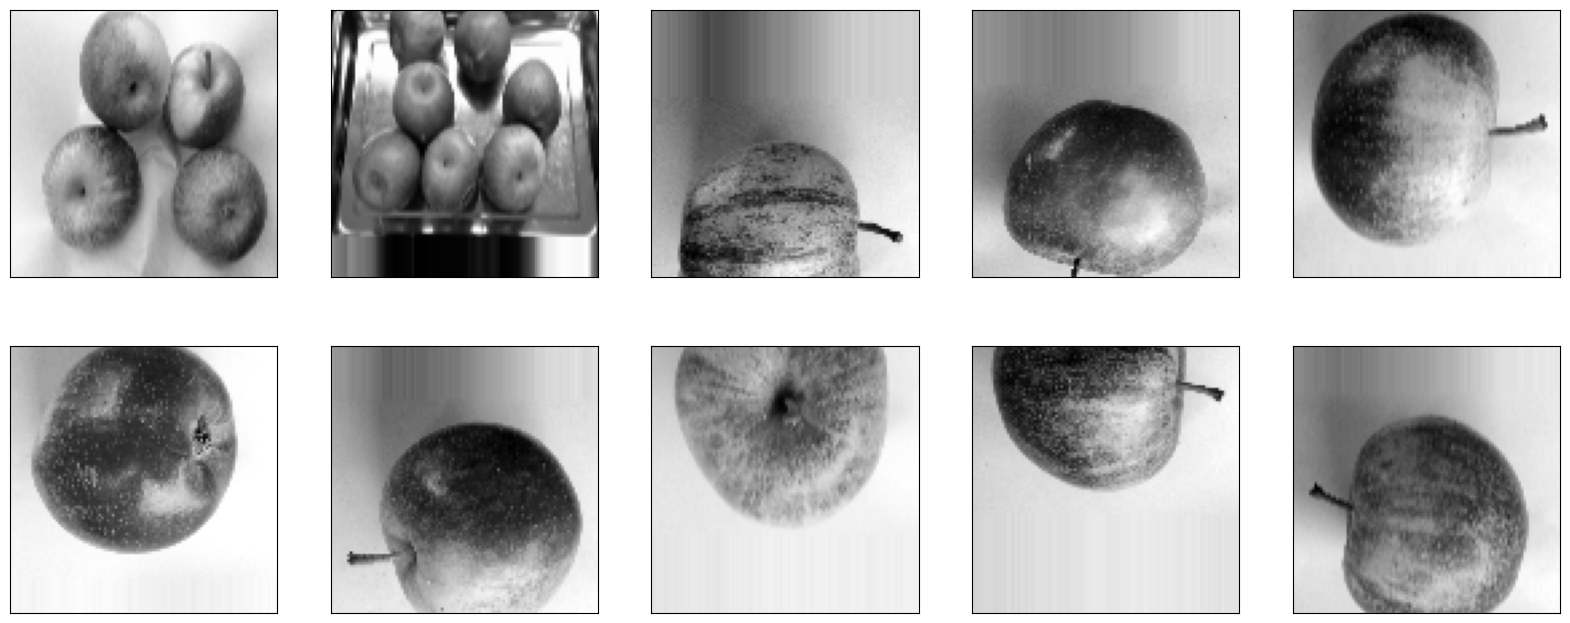

In [23]:
#generating the data augmentation
#move the image horizontally?
datagen=ImageDataGenerator(
    width_shift_range=.5
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen,etiqueta in datagen.flow(X,y,batch_size=10,shuffle=False):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i].reshape(100,100),cmap="gray")
    break

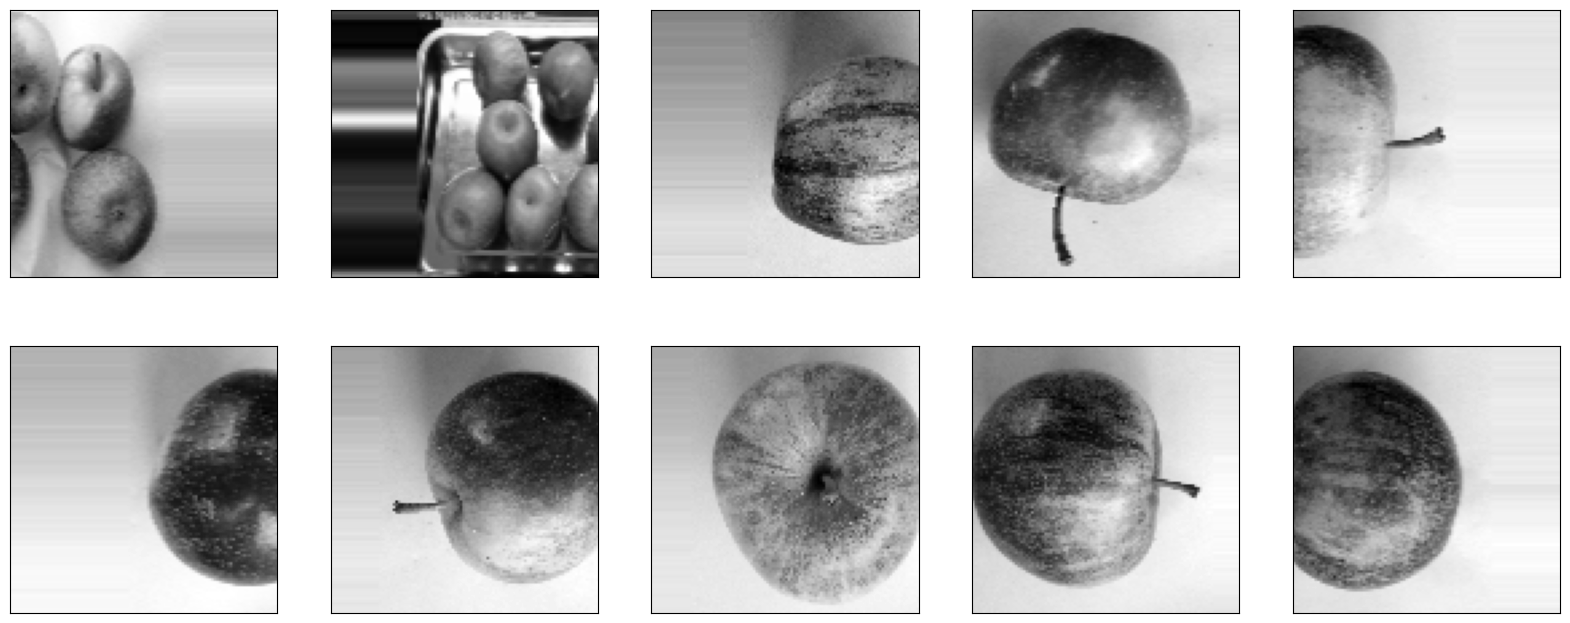

In [25]:
#generating the data augmentation
#move the image vertically?
datagen=ImageDataGenerator(
    height_shift_range=.5
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen,etiqueta in datagen.flow(X,y,batch_size=10,shuffle=False):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i].reshape(100,100),cmap="gray")
    break

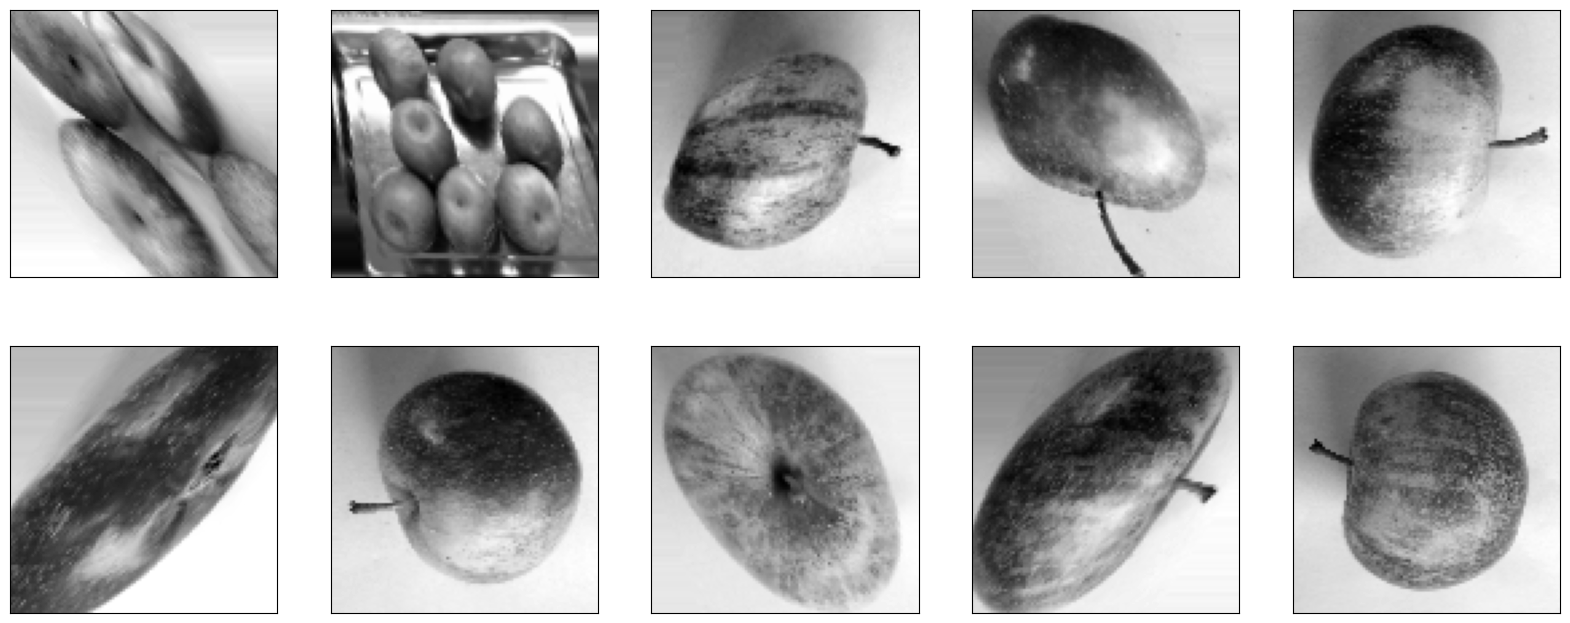

In [26]:
#generating the data augmentation
#make the image lean
datagen=ImageDataGenerator(
    shear_range=50
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen,etiqueta in datagen.flow(X,y,batch_size=10,shuffle=False):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i].reshape(100,100),cmap="gray")
    break

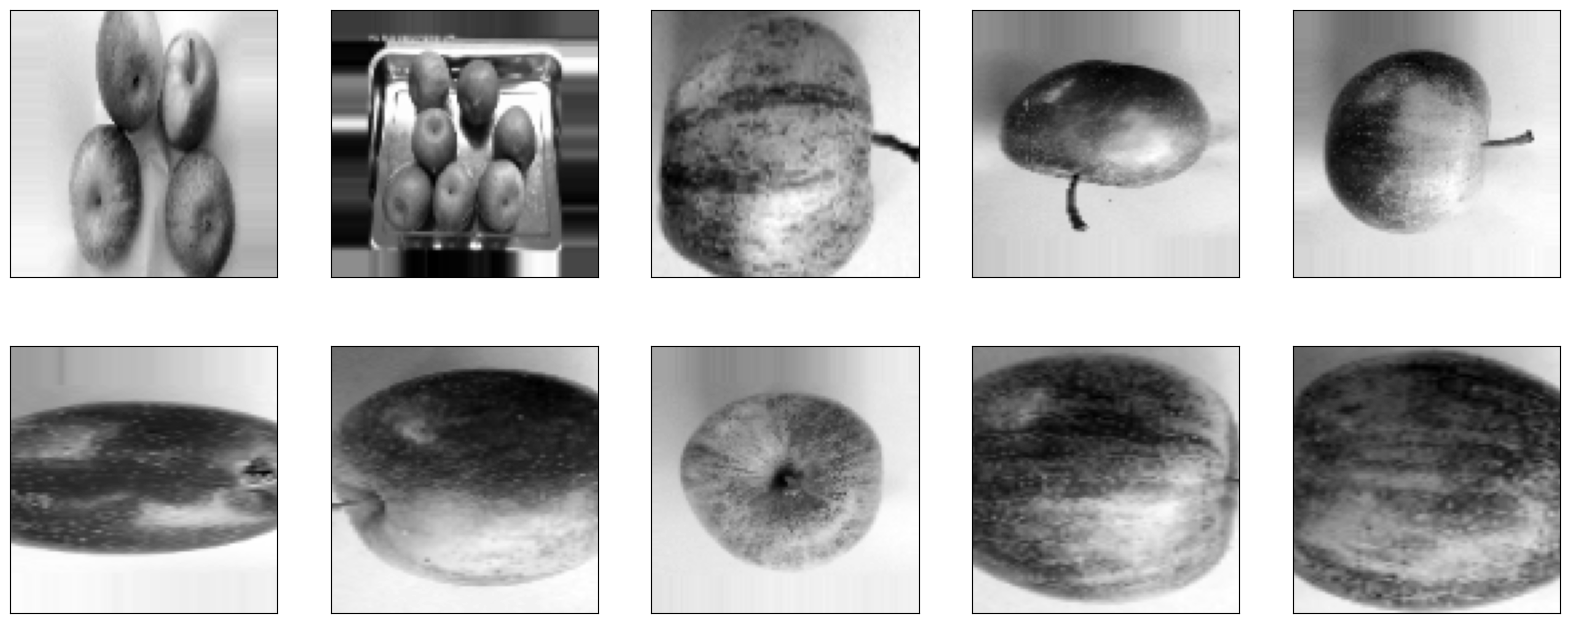

In [27]:
#generating the data augmentation
#how close or how far is a zooming
datagen=ImageDataGenerator(
    zoom_range=[0.5,1.5] #half of the image or 150% percent of the image
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen,etiqueta in datagen.flow(X,y,batch_size=10,shuffle=False):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i].reshape(100,100),cmap="gray")
    break

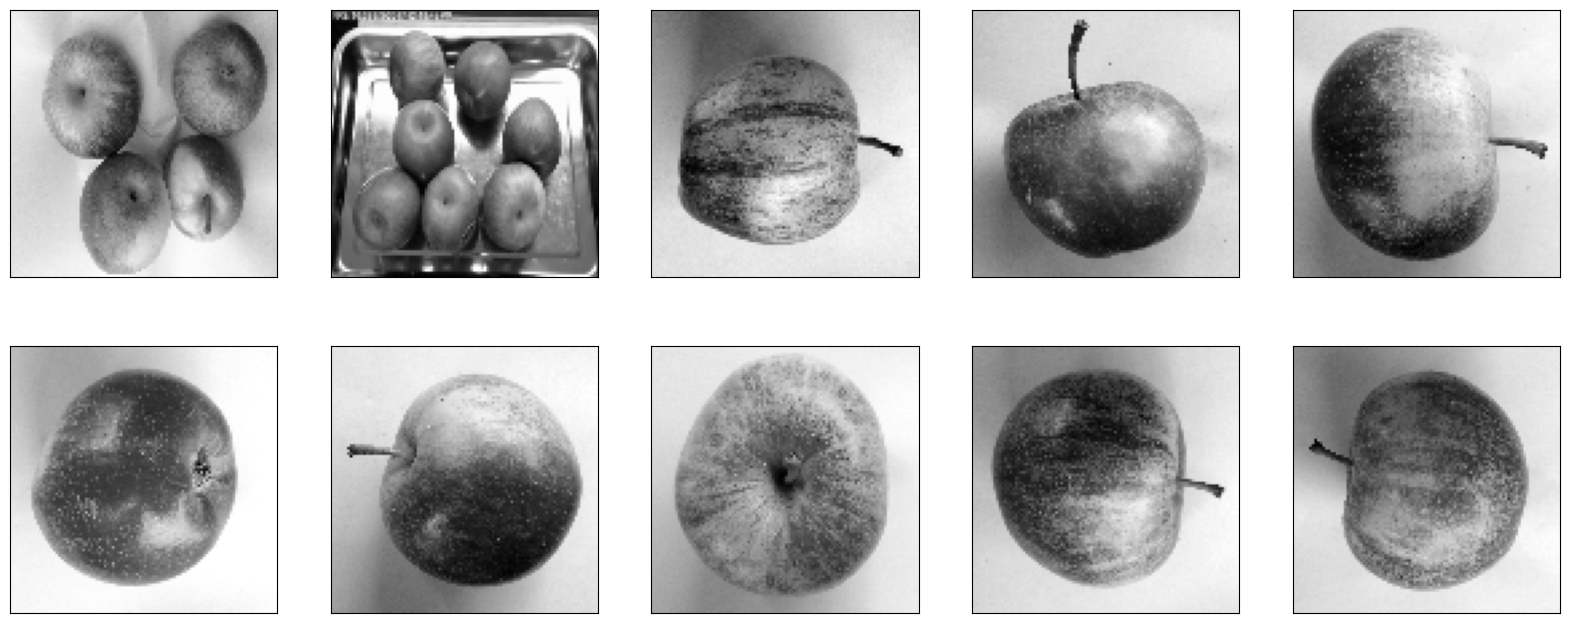

In [29]:
#generating the data augmentation
#do vertical or horizontal random flips
datagen=ImageDataGenerator(
    vertical_flip=True
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen,etiqueta in datagen.flow(X,y,batch_size=10,shuffle=False):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i].reshape(100,100),cmap="gray")
    break

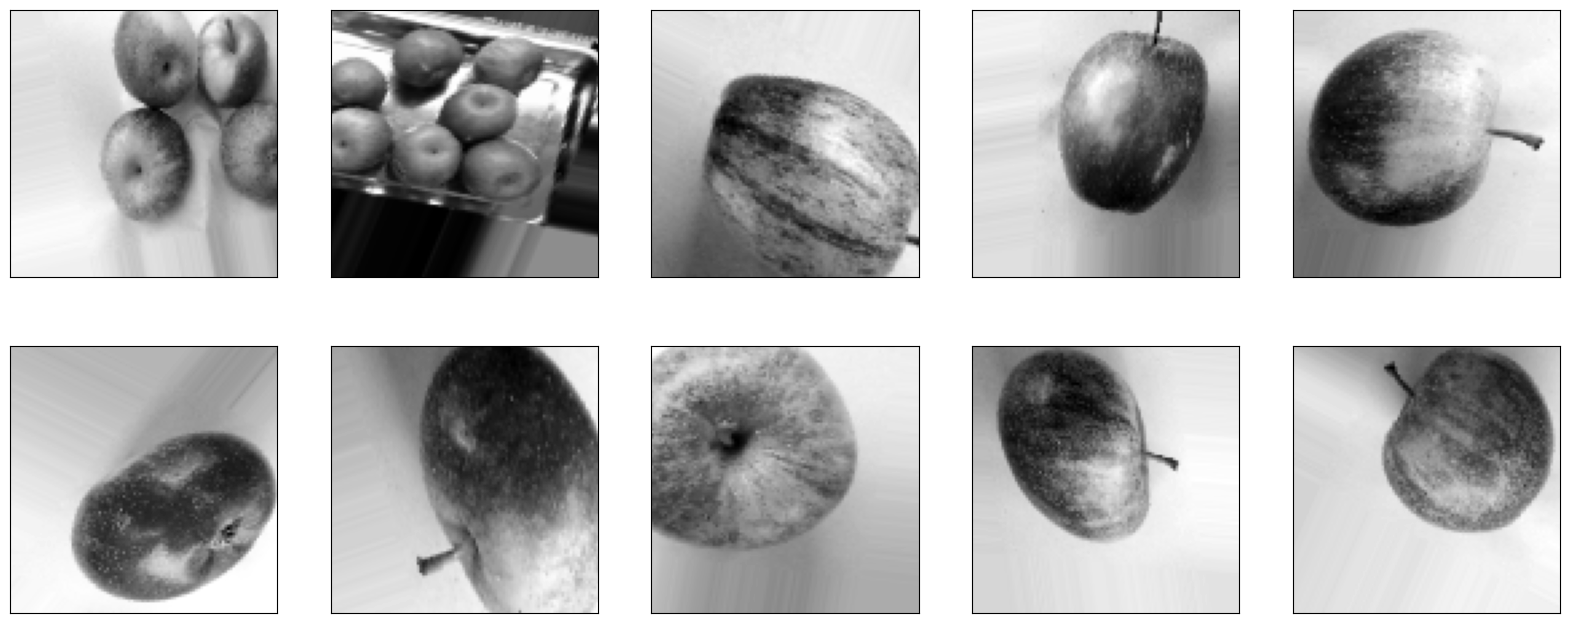

In [30]:
#generating the data augmentation
#do vertical or horizontal random flips
datagen=ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=15,
    zoom_range=[0.7,1.4],
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X)

plt.figure(figsize=(20,8))

for imagen,etiqueta in datagen.flow(X,y,batch_size=10,shuffle=False):
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen[i].reshape(100,100),cmap="gray")
    break

In [53]:
#with data aumentation
denseModel_DA=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(100,100,1)),
    tf.keras.layers.Dense(150,activation="relu"),
    tf.keras.layers.Dense(150, activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [54]:
denseModel_DA.compile(optimizer="adam",
                   loss="binary_crossentropy",
                   metrics=["accuracy"])

In [55]:
print(len(X))
print(len(X) * 0.85) #4563 for testing
print(len(X) - 4563) #805 for validation

X_training=X[:4563] #85% of training
X_validation=X[4563:] #15% of validation

y_training=y[:4563] #85% of training
y_validation=y[4563:] #15% of validatio

5368
4562.8
805


In [56]:
data_gen_training=datagen.flow(X_training,y_training,batch_size=32)

In [57]:
denseModel_DA.fit(
    data_gen_training,
    epochs=100, batch_size=32,
    validation_data=(X_validation,y_validation),
    steps_per_epoch=int(np.ceil(len(X_training)/float(32))),
    validation_steps=int(np.ceil(len(X_validation)/float(32)))
)

Epoch 1/100
143/143 [==============================] - 3s 19ms/step - loss: 0.8205 - accuracy: 0.5391 - val_loss: 0.7488 - val_accuracy: 0.2298
Epoch 2/100
143/143 [==============================] - 2s 17ms/step - loss: 0.6874 - accuracy: 0.5656 - val_loss: 0.6451 - val_accuracy: 0.6286
Epoch 3/100
143/143 [==============================] - 3s 18ms/step - loss: 0.6922 - accuracy: 0.5729 - val_loss: 0.8375 - val_accuracy: 0.2236
Epoch 4/100
143/143 [==============================] - 3s 18ms/step - loss: 0.6813 - accuracy: 0.5722 - val_loss: 0.9048 - val_accuracy: 0.0248
Epoch 5/100
143/143 [==============================] - 3s 20ms/step - loss: 0.6775 - accuracy: 0.5650 - val_loss: 0.8177 - val_accuracy: 0.0000e+00
Epoch 6/100
143/143 [==============================] - 2s 17ms/step - loss: 0.6807 - accuracy: 0.5560 - val_loss: 0.7066 - val_accuracy: 0.0000e+00
Epoch 7/100
143/143 [==============================] - 2s 17ms/step - loss: 0.6794 - accuracy: 0.5661 - val_loss: 0.9701 - val_a

OLD VERSION OF IMAGES DATA CONSUMING

import shutil

carpeta_fuente=r"C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\Apple__Healthy"
carpeta_destino=r"C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\dataset\Apple__Healthy"

imagenes=os.listdir(carpeta_fuente)

"""
for i,nombreimg in enumerate(imagenes):
    if i<419:
        shutil.copy(carpeta_fuente+"/"+nombreimg,carpeta_destino+"/"+nombreimg)"""

carpeta_fuente=r"C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\Apple__Rotten"
carpeta_destino=r"C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\dataset\Apple__Rotten"

imagenes=os.listdir(carpeta_fuente)

"""
for i,nombreimg in enumerate(imagenes):
    if i<419:
        shutil.copy(carpeta_fuente+"/"+nombreimg,carpeta_destino+"/"+nombreimg)"""

datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=15,
    zoom_range=[0.5,1.5],
    validation_split=0.2
)


data_gen_entramiento=datagen.flow_from_directory(r"C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\dataset",target_size=(100,100)
                                                 ,batch_size=32,shuffle=True,subset="training")

data_gen_pruebas=datagen.flow_from_directory(r"C:\Users\alexa\OneDrive\Escritorio\LAMBTON COLLEGE\2nd semester\Introduction to Artificial Intelligence\Project\dataset",target_size=(100,100)
                                                 ,batch_size=32,shuffle=True,subset="validation")

#plt.figure(figsize=(20,20))

#TAMAÑO_IMG=200

for imagen,etiqueta in data_gen_entramiento:
    for i in range(10):
        print(imagen.shape)
        imagen_gris = cv2.cvtColor(imagen[i], cv2.COLOR_RGB2GRAY)
        plt.subplot(2,5,i+1)
        plt.xticks([])
        plt.yticks([])
        #plt.imshow(imagen[i])
        plt.imshow(imagen_gris,cmap="gray")
        # Convertir la etiqueta a texto legible
        """
        if etiqueta[i][0] == 0 and etiqueta[i][1] == 1:
            etiqueta_texto = "Not Healthy"
        elif etiqueta[i][0] == 1 and etiqueta[i][1] == 0:
            etiqueta_texto = "Healthy"
        else:
            etiqueta_texto = "Desconocido"
        
        plt.xlabel(etiqueta_texto)
        """
        plt.xlabel(etiqueta[i])
    break

for imagenes, etiquetas in data_gen_entramiento:
    for i in range(len(imagenes)):
        imagen_actual = imagenes[i]  # Obtener la imagen actual del lote
        
        # Redimensionar y mostrar la imagen en escala de grises
        #imagen_actual = cv2.cvtColor(imagen_actual, cv2.COLOR_RGB2GRAY)
        plt.subplot(2, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imagen_actual)
        #plt.imshow(imagen_actual, cmap="gray")
        plt.xlabel(etiquetas[i])  # Mostrar la etiqueta en el gráfico
        print(imagen_actual.shape)
        if i == 9:
            break  # Mostrar solo las primeras 10 imágenes
    break  # Romper el bucle externo después del primer lote


print(type(data_gen_entramiento))

datos_entrenamiento=[]
iteration=1
for imagenes, etiquetas in data_gen_entramiento:
    print("entering the iteration: ",iteration)
    for i in range(len(imagenes)):
        imagen_actual = imagenes[i]  # Obtener la imagen actual del lote
        imagen_actual=cv2.resize(imagen_actual, (100, 100))
        imagen_actual=cv2.cvtColor(imagen_actual, cv2.COLOR_RGB2GRAY)
        imagen_actual = imagen_actual.reshape(100, 100, 1)
        datos_entrenamiento.append([imagen, etiqueta])
        # Redimensionar y mostrar la imagen en escala de grises
        #imagen_actual = cv2.cvtColor(imagen_actual, cv2.COLOR_RGB2GRAY)
        #print(imagen_actual.shape)
    iteration+=1
